In [1]:
# idea: find outliers in building and weather data
# replace or drop them and inspect changes on score
# if we drop a whole building we have to drop the building id feature as well(?)
import pandas as pd
# we could also tag them with an outlier indicator

In [28]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

In [6]:
train_df = pd.read_csv("../data/raw/train.csv")

In [12]:
building_df = pd.read_csv("../data/raw/building_metadata.csv")

In [9]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [13]:
building_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [87]:
building_df.shape

(1449, 6)

In [39]:
min(building_df.square_feet) # 283
any(building_df.square_feet.isna()) # False

False

In [ ]:
np.info(np.log1p) # used in build_features uses log(1+x), better (?) np.log
np.log1p(1000)    # 6.90875477931522
np.log1p(999)     # 6.907755278982137

In [43]:
building_log = np.log(building_df['square_feet'])

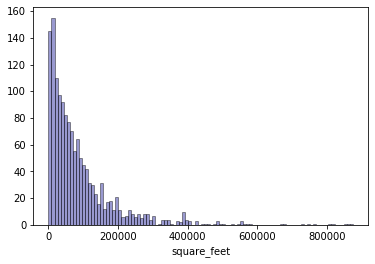

In [24]:
sns.distplot(building_df['square_feet'], hist = True, kde = False,
             bins = 100, color = 'darkblue', hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 4})

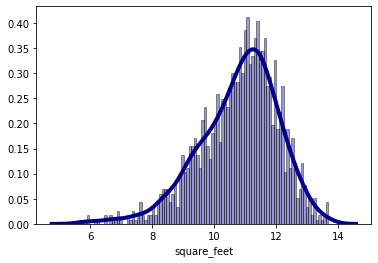

In [45]:
# x-axis is log square_feet! change name 
sns.distplot(building_log, hist = True, kde = True,
             bins = 100, color = 'darkblue', hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 4})

In [65]:
mn = np.mean(building_log)

In [66]:
std = np.std(building_log)

In [79]:
lower =  mn - 2.5*std

In [68]:
upper = mn + 2.5*std

In [93]:
sum(building_log > upper)

0

In [94]:
sum(building_log < lower)

27

In [91]:
building_log_dense = building_log[((building_log > lower) & (building_log < upper))]

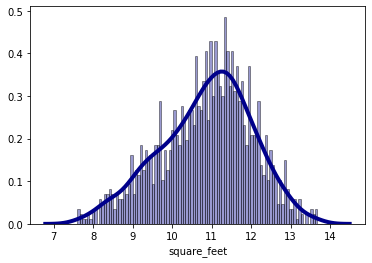

In [92]:
# x-axis is log square_feet! change name 
sns.distplot(building_log_dense, hist = True, kde = True,
             bins = 100, color = 'darkblue', hist_kws = {'edgecolor': 'black'},
            kde_kws = {'linewidth': 4})